In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


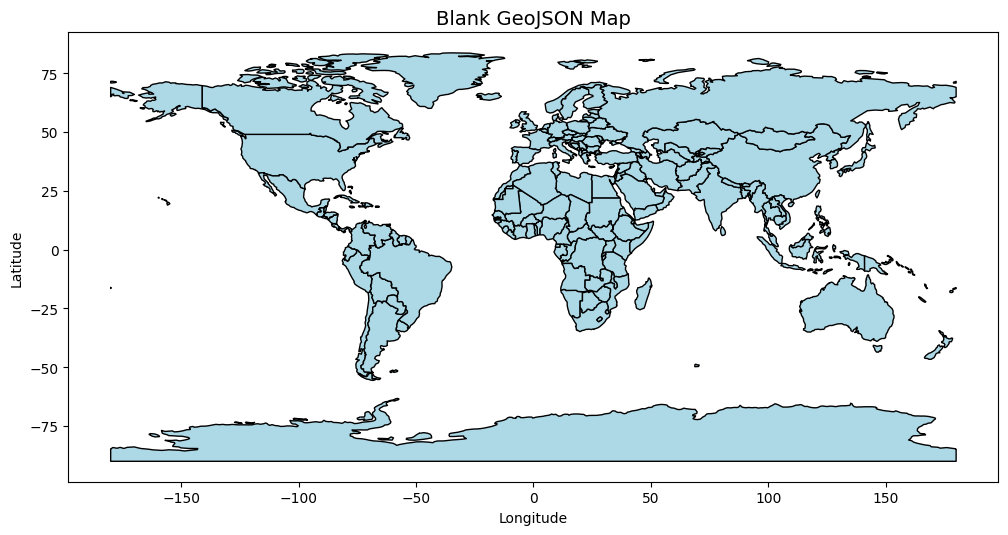

In [2]:
# Load local GeoJSON file
geojson_df = gpd.read_file("Resources/custom.geo.json")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 6))
geojson_df.plot(ax=ax, color="lightblue", edgecolor="black")

ax.set_title("Blank GeoJSON Map", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Save the map as a PNG file
plt.savefig("geojson_map.png", dpi=300, bbox_inches="tight")

# Show the map
plt.show()


In [3]:
# Get the updated unique country names from geojson_df
unique_countries = geojson_df["name"].unique()
geo_sorted_countries = sorted(unique_countries)

# Print sorted country names from geojson_df
print("Total number of countries:", len(geo_sorted_countries))
print(geo_sorted_countries)


Total number of countries: 177
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',

In [4]:
# Load main_merged.csv file
main_merged_df = pd.read_csv("Resources/main_merged.csv")

# Print # of unique countries and their names
unique_main_merged = main_merged_df["Country name"].unique()
print("Total number of countries:", len(unique_main_merged))
print(unique_main_merged)


Total number of countries: 135
['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin'
 'Bolivia' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'Finland' 'France'
 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico'
 'Moldova' 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Namibia'
 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua' 'Niger' 'Niger

In [5]:
# Convert lists directly into sets
geojson_set = set(geo_sorted_countries)
main_merged_set = set(unique_main_merged)

# Find different countries found in sorted_countries but not in unique_main_df and vice versa
geojson_diff = geojson_set - main_merged_set
main_merged_diff = main_merged_set - geojson_set

# Print the differences
print("Different Countries in geojson:", geojson_diff)
print("Different Countries in main_merged:", main_merged_diff)


Different Countries in geojson: {'N. Cyprus', 'Somalia', 'Palestine', 'Central African Rep.', 'Guinea-Bissau', 'North Korea', 'Antarctica', 'Dominican Rep.', 'Gambia', 'New Caledonia', 'North Macedonia', 'Eritrea', 'Eq. Guinea', 'South Korea', 'Fiji', 'Puerto Rico', 'Brunei', 'Qatar', 'Fr. S. Antarctic Lands', 'United States of America', 'Myanmar', 'Angola', 'Djibouti', 'Oman', 'Solomon Is.', 'Greenland', 'Syria', 'Trinidad and Tobago', 'Czechia', 'S. Sudan', 'Belize', 'Dem. Rep. Congo', 'W. Sahara', 'Falkland Is.', 'Papua New Guinea', 'Vanuatu', 'Kosovo', 'Guyana', 'eSwatini', 'Congo', 'Sudan', 'Bosnia and Herz.', 'Bhutan', 'Timor-Leste', 'Bahamas', 'Suriname', 'Taiwan', "Côte d'Ivoire", 'Somaliland', 'Cuba'}
Different Countries in main_merged: {'Bahrain', 'Mauritius', 'United States', 'Maldives', 'Comoros', 'Singapore', 'Malta', 'Dominican Republic'}


In [6]:
# Rename "United States of America" to "United States" in the "name" column of geojson_df
geojson_df["name"] = geojson_df["name"].replace({"United States of America": "United States"})

# List of countries to exclude
exclude_countries = ["Mauritius", "Malta", "Comoros", "Serbia", "Tanzania", 
                     "Singapore", "Maldives", "Bahrain"]

# Filter out countries from main_merged_df "Country name" column
filtered_countries = [country for country in main_merged_df["Country name"] if country not in exclude_countries]

# Filter geojson_df based on filtered countries list
geojson_df_filtered = geojson_df[geojson_df["name"].isin(filtered_countries)]

# Print the total # of filtered countries in geojson_df
print("Total number of countries in filtered geojson_df:", len(geojson_df_filtered))

# Print filtered countries
print(geojson_df_filtered["name"].unique())


Total number of countries in filtered geojson_df: 126
['Costa Rica' 'Nicaragua' 'Haiti' 'El Salvador' 'Guatemala' 'Honduras'
 'United States' 'Canada' 'Mexico' 'Panama' 'Jamaica' 'Indonesia'
 'Malaysia' 'Cyprus' 'India' 'China' 'Israel' 'Lebanon' 'Uzbekistan'
 'Kazakhstan' 'Tajikistan' 'Mongolia' 'Vietnam' 'Cambodia'
 'United Arab Emirates' 'Georgia' 'Azerbaijan' 'Turkey' 'Laos'
 'Kyrgyzstan' 'Armenia' 'Iraq' 'Iran' 'Saudi Arabia' 'Pakistan' 'Thailand'
 'Kuwait' 'Bangladesh' 'Afghanistan' 'Turkmenistan' 'Jordan' 'Nepal'
 'Yemen' 'Philippines' 'Sri Lanka' 'Japan' 'Chile' 'Bolivia' 'Peru'
 'Argentina' 'Brazil' 'Uruguay' 'Ecuador' 'Colombia' 'Paraguay'
 'Venezuela' 'Ethiopia' 'Kenya' 'Malawi' 'Morocco' 'Namibia'
 'South Africa' 'Libya' 'Tunisia' 'Zambia' 'Sierra Leone' 'Guinea'
 'Liberia' 'Mali' 'Senegal' 'Nigeria' 'Benin' 'Botswana' 'Zimbabwe' 'Chad'
 'Algeria' 'Mozambique' 'Burundi' 'Rwanda' 'Uganda' 'Lesotho' 'Cameroon'
 'Gabon' 'Niger' 'Burkina Faso' 'Togo' 'Ghana' 'Egypt' 'Mauritania

In [7]:
# Merge filtered geo.json file with main_merged_df using "Regional indicator"
final_merge_gdf = geojson_df_filtered.merge(main_merged_df[["Country name", "Regional indicator", "Ladder score", "weighted_happiness", "Regional Happiness Deviation"]],  
                                             left_on = "name", right_on = "Country name", how = "left")

final_merge_gdf.head()


,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_se,fclass_bd,fclass_ua,filename,geometry,Country name,Regional indicator,Ladder score,weighted_happiness,Regional Happiness Deviation
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,None,None,None,CRI.geojson,"POLYGON ((-82.5462 9.56613, -82.93289 9.47681,...",Costa Rica,Latin America and Caribbean,7.069,6.077531,0.991469
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,None,None,None,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726...",Nicaragua,Latin America and Caribbean,5.972,6.077531,-0.105531
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",Haiti,Latin America and Caribbean,3.615,6.077531,-2.462531
3,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,None,None,None,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340...",El Salvador,Latin America and Caribbean,6.061,6.077531,-0.016531
4,Admin-0 country,1,3,Guatemala,GTM,0,2,Sovereign country,1,Guatemala,...,None,None,None,GTM.geojson,"POLYGON ((-92.22775 14.53883, -92.20323 14.830...",Guatemala,Latin America and Caribbean,6.435,6.077531,0.357469


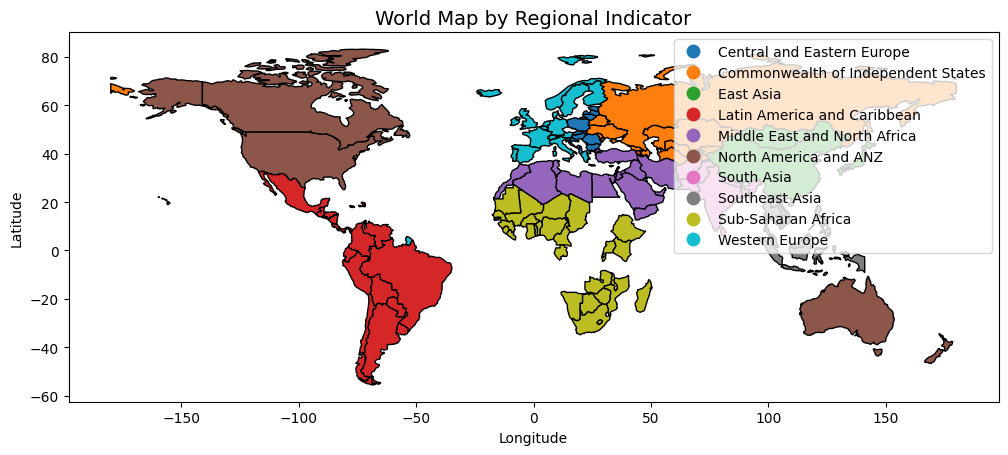

In [8]:
# Plot the world map colored by regional indicator
fig, ax = plt.subplots(figsize = (12, 6))
final_merge_gdf.plot(column = "Regional indicator", cmap = "tab10", legend = True, edgecolor = "black", ax = ax)

# Set map title and x/y labels
ax.set_title("World Map by Regional Indicator", fontsize = 14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

# Add Folium map to display interactive map centered around the world
m = folium.Map(location = [0, 0], zoom_start = 2)

# Add GeoJSON layer with tooltip
folium.GeoJson(
    final_merge_gdf,
    tooltip = GeoJsonTooltip(fields = ["name", "Regional indicator"], aliases = ["Country:", "Region:"])
).add_to(m)

# Save the map as an HTML file
m.save("interactive_map.html")


In [9]:
# Initialize Folium interactive map
interactive_map = folium.Map(location = [20, 0], zoom_start = 2, tiles = "cartodb positron")

# Generate a color palette for unique regions
regions = final_merge_gdf["Regional indicator"].dropna().unique()

# Convert color palette to HEX
palette = sns.color_palette("tab10", len(regions)).as_hex()

# Map each region to a color
region_colors = dict(zip(regions, palette))

# Define tooltip information to display as hover text
tooltip = GeoJsonTooltip(
    fields = ["Country name", "Regional indicator", "Ladder score", "weighted_happiness","Regional Happiness Deviation"],
    aliases = ["Country Name", "Regional Indicator", "Happiness Score", "Regional Happiness", "Regional Happiness Deviation"],
    localize = True,
    sticky = False,
    labels = True,
    style = "background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;"
)

# Add GeoJSON layer with dynamic colors based on "Regional indicator"
folium.GeoJson(
    final_merge_gdf,
    name = "World Map by Region",
    tooltip = tooltip,
    style_function = lambda feature: {
        "fillColor": region_colors.get(feature["properties"].get("Regional indicator"), "gray"),  
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.7
    }
).add_to(interactive_map)

# Add a Layer Control to toggle between clean map and map by region
folium.LayerControl().add_to(interactive_map)

# Save and display the Interactive Map as an HTML file and within Jupyter notebook
interactive_map.save("interactive_map.html")
interactive_map


In [10]:
# Initialize Folium interactive map
interactive_heatmap = folium.Map(location = [20, 0], zoom_start = 2, tiles = "cartodb positron")

# Define tooltip information to display as hover text
tooltip = GeoJsonTooltip(
    fields = ["Country name", "Regional indicator", "Ladder score", "weighted_happiness", "Regional Happiness Deviation"],
    aliases = ["Country Name", "Regional Indicator", "Happiness Score", "Regional Happiness", "Regional Happiness Deviation"],
    localize = True,
    sticky = False,
    labels = True,
    style = "background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;"
)

# Add GeoJSON layer without region-based color
folium.GeoJson(
    final_merge_gdf,
    name = "World Map",
    tooltip = tooltip,
    style_function = lambda feature: {
        "fillColor": "lightgray",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.3
    }
).add_to(interactive_heatmap)

# Add HeatMap Layer Based on Happiness Score
heat_data = []

for _, row in final_merge_gdf.iterrows():
    lat = row["geometry"].centroid.y if row["geometry"] else None
    lon = row["geometry"].centroid.x if row["geometry"] else None
    happiness = row["weighted_happiness"]

# Intensity is equal to previously created happiness row
    if lat is not None and lon is not None and not np.isnan(happiness):
        heat_data.append([lat, lon, happiness])

# Add HeatMap overlay based on Happiness Score intensity
HeatMap(heat_data, name = "Happiness HeatMap", min_opacity = 0.3, max_val = max(final_merge_gdf["weighted_happiness"].dropna()), radius = 15, blur = 10).add_to(interactive_heatmap)

# Add Layer Control to toggle between clean map and heatmap
folium.LayerControl().add_to(interactive_heatmap)
# "interactive_map.html"

# Save and display the Interactive Map as an HTML file and within Jupyter notebook
interactive_heatmap.save("interactive_heatmap.html")
interactive_heatmap


C:\Users\deysi\AppData\Local\Temp\ipykernel_12728\1374900713.py:40: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, name = "Happiness HeatMap", min_opacity = 0.3, max_val = max(final_merge_gdf["weighted_happiness"].dropna()), radius = 15, blur = 10).add_to(interactive_heatmap)
